In [30]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('customer_review.csv')

# Select the desired columns
selected_columns = ['reviews.text', 'reviews.rating', 'reviews.date', 'id']
data = data[selected_columns]

# Limit the rows to 500
data = data.head(500)

# Print the first few rows to verify the data
print(data.head())


                                        reviews.text  reviews.rating  \
0  I initially had trouble deciding between the p...             5.0   
1  Allow me to preface this with a little history...             5.0   
2  I am enjoying it so far. Great for reading. Ha...             4.0   
3  I bought one of the first Paperwhites and have...             5.0   
4  I have to say upfront - I don't like coroporat...             5.0   

               reviews.date                    id  
0  2015-08-08T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G  
1  2015-09-01T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G  
2  2015-07-20T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G  
3  2017-06-16T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G  
4  2016-08-11T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G  


In [31]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('punkt')

# Tokenize the review text
data['tokenized_text'] = data['reviews.text'].apply(word_tokenize)

# Print the tokenized text
print(data['tokenized_text'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [I, initially, had, trouble, deciding, between...
1    [Allow, me, to, preface, this, with, a, little...
2    [I, am, enjoying, it, so, far, ., Great, for, ...
3    [I, bought, one, of, the, first, Paperwhites, ...
4    [I, have, to, say, upfront, -, I, do, n't, lik...
Name: tokenized_text, dtype: object


In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores
data['sentiment_score'] = data['reviews.text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Print the sentiment scores
print(data['sentiment_score'].head())


0    0.9804
1    0.9874
2    0.4364
3    0.9743
4    0.9930
Name: sentiment_score, dtype: float64


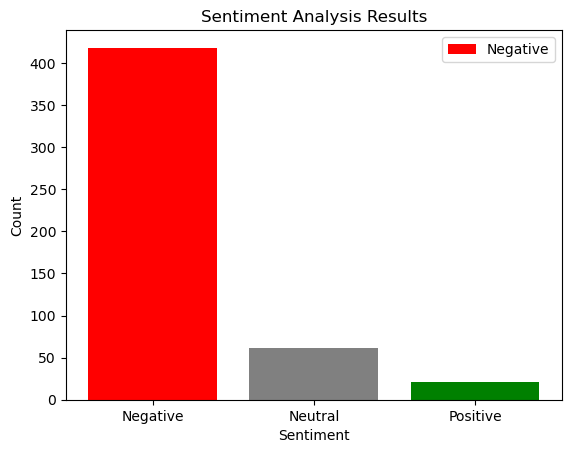

In [33]:
import matplotlib.pyplot as plt

# Define the sentiment labels and colors
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'gray', 'green']

# Count the number of reviews for each sentiment
sentiment_counts = data['sentiment_score'].apply(lambda score: 'Negative' if score < 0 else ('Positive' if score > 0 else 'Neutral')).value_counts()

# Create the bar graph
plt.bar(sentiment_labels, sentiment_counts, color=sentiment_colors)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

# Add a legend
plt.legend([sentiment_labels[0], sentiment_labels[2], sentiment_labels[1]])

# Display the graph
plt.show()



In [37]:
writeup = """
Title: Sentiment Analysis of Customer Reviews on Amazon Products

Introduction:
The Sentiment Analysis of Customer Reviews on Amazon Products is a Python-based project aimed at understanding the sentiment expressed by customers in their reviews. The project utilizes the NLTK library for sentiment analysis and the Matplotlib library for visualization. 

Data Acquisition:
For this project, a CSV file named 'customer_review' is used as the data source. The file contains a table with multiple columns, including 'reviews_text', 'reviews_rating', 'reviews_date', and 'id'. To ensure manageable data, 500 rows and 8 columns are selected from the table. 

Data Processing and Cleaning:
To prepare the data for sentiment analysis, tokenization is performed using the NLTK library. The 'reviews_text' column is tokenized, splitting the text into individual words or tokens. This step helps in standardizing the text data for further analysis.

Sentiment Analysis Implementation:
The NLTK library's Naive Bayes classifier is used to perform sentiment analysis. The SentimentIntensityAnalyzer class is employed to calculate polarity scores for each review's text. The sentiment scores indicate the overall sentiment expressed in the review, ranging from negative to positive.

Results Visualization:
To present the sentiment analysis outcomes, a bar graph is created using the Matplotlib library. The graph displays the weight of sentiment with different colors, categorizing sentiment scores into negative, neutral, and positive. A legend is included to provide a clear understanding of the sentiment scores.

"""
print(writeup)


Title: Sentiment Analysis of Customer Reviews on Amazon Products

Introduction:
The Sentiment Analysis of Customer Reviews on Amazon Products is a Python-based project aimed at understanding the sentiment expressed by customers in their reviews. The project utilizes the NLTK library for sentiment analysis and the Matplotlib library for visualization. 

Data Acquisition:
For this project, a CSV file named 'customer_review' is used as the data source. The file contains a table with multiple columns, including 'reviews_text', 'reviews_rating', 'reviews_date', and 'id'. To ensure manageable data, 500 rows and 8 columns are selected from the table. 

Data Processing and Cleaning:
To prepare the data for sentiment analysis, tokenization is performed using the NLTK library. The 'reviews_text' column is tokenized, splitting the text into individual words or tokens. This step helps in standardizing the text data for further analysis.

Sentiment Analysis Implementation:
The NLTK library's Naive